In [ ]:
pip install tensorflow_io

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 93.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.33.0
    Uninstalling tensorflow-io-gcs-filesystem-0.33.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.33.0


In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import gc
import copy
import random

In [ ]:
import tensorflow as tf
from skimage.color import rgb2lab, lab2rgb
import tensorflow_io as tfio
from tensorflow.keras import datasets, layers, models, Model, utils

In [ ]:
#import psutil
#import time


#memory_usage = psutil.virtual_memory()
#print(f"Memory Usage: {memory_usage.percent}%")
#print(memory_usage)


## Load Data

loading on local host

In [ ]:
#images_lab = np.load("checkpoint/1001_LAB.npy")
#color_blots = np.load("checkpoint/color_blots.npy")

Loading data in colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#del images_train
#del images_train_ab
#del images_test
#del images_test_ab
#gc.collect()

In [ ]:
images_lab = np.load("drive/My Drive/deep_learning_projects/LAB/1001_LAB3_65.npy")
color_blots = np.load("drive/My Drive/deep_learning_projects/color_blots/color_blots3_10.npy")

In [ ]:
i = 1000

In [ ]:
images_lab = images_lab[i-1000:i,:,:,:]
color_blots = color_blots[i-1000:i,:,:,:]

In [ ]:
full = np.concatenate([images_lab,color_blots], axis = 3)

In [ ]:
del images_lab, color_blots
gc.collect()

75

In [ ]:
full.shape

(1000, 512, 256, 6)

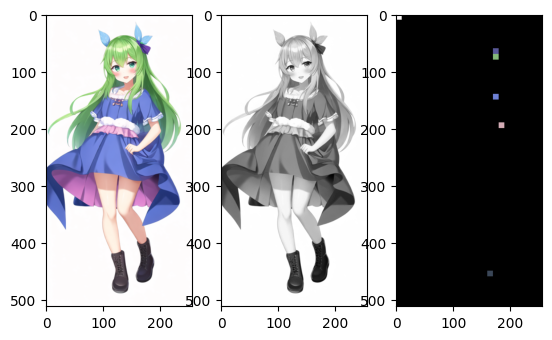

In [ ]:
image_idx = 42
fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
img = lab2rgb(full[image_idx,:,:,0:3])
ax1.imshow(img)
ax2.imshow(full[image_idx,:,:,0],cmap = "gray")
ax3.imshow(full[image_idx,:,:,3:6].astype(np.uint8))

## testing values for data normalisation vs standardisation.

In [ ]:
#data = copy.deepcopy(full[:,:,:,3:6]/np.max(full[:,:,:,3:6]))
#print(np.max(data))
#print(np.min(data))
#print(np.mean(data))

# Normalisation

In [ ]:
full = full.astype(np.float16)

In [ ]:
full[:,:,:,0] = full[:,:,:,0]/100
full[:,:,:,1:3] = full[:,:,:,1:3]/np.max(full[:,:,:,1:3])
full[:,:,:,3:6] = full[:,:,:,3:6]/np.max(full[:,:,:,3:6])

In [ ]:
#using half of data ...train 700-1400 next round and for test 1700-1850
images_train = full[0:700,:,:,(0,3,4,5)]
images_train_ab = full[0:700,:,:,1:3]
images_test = full[850:1000,:,:,(0,3,4,5)]
images_test_ab = full[850:1000,:,:,1:3]


In [ ]:
#images_val_ab = full[700:850,:,:,1:3]
#images_val = full[700:850,:,:,(0,3,4,5)]

In [ ]:
print(images_train.shape)
print(images_train_ab.shape)
print(images_test.shape)
print(images_test_ab.shape)
#print(images_val.shape)
#print(images_val_ab.shape)

(700, 512, 256, 4)
(700, 512, 256, 2)
(150, 512, 256, 4)
(150, 512, 256, 2)


In [ ]:
#Generate 5 random numbers between 10 and 30
randomlist = random.sample(range(0, 700), 15)

In [ ]:
#1. Loading 1400-1700
#2. Loading 2700-2850
#random_data = np.load("drive/My Drive/deep_learning_projects/random_data/val_images.npy")
#random_data = np.concatenate([random_data,full[randomlist,:,:,:]],axis = 0)
#np.save("drive/My Drive/deep_learning_projects/random_data/val_images.npy",random_data)

In [ ]:
#old_val = np.load("drive/My Drive/deep_learning_projects/test_data/val_images.npy")
#old_val_ab = np.load("drive/My Drive/deep_learning_projects/test_data/val_images_ab.npy")
#np.save("drive/My Drive/deep_learning_projects/test_data/val_images.npy",np.concatenate([old_val,images_val],axis = 0))
#np.save("drive/My Drive/deep_learning_projects/test_data/val_images_ab.npy",np.concatenate([old_val_ab,images_val_ab],axis = 0))

In [ ]:
#np.load("drive/My Drive/deep_learning_projects/test_data/val_images.npy",images_val)
#np.load("drive/My Drive/deep_learning_projects/test_data/val_images_ab.npy",images_val_ab)

In [ ]:
#print(images_train[1,:,:,:])

In [ ]:
del full, images_val, images_val_ab#, old_val, old_val_ab
gc.collect()

40

In [ ]:
loaded_model = tf.keras.models.load_model('drive/My Drive/deep_learning_projects/models/unet_blot_2100img.keras')

## Model Evaluation

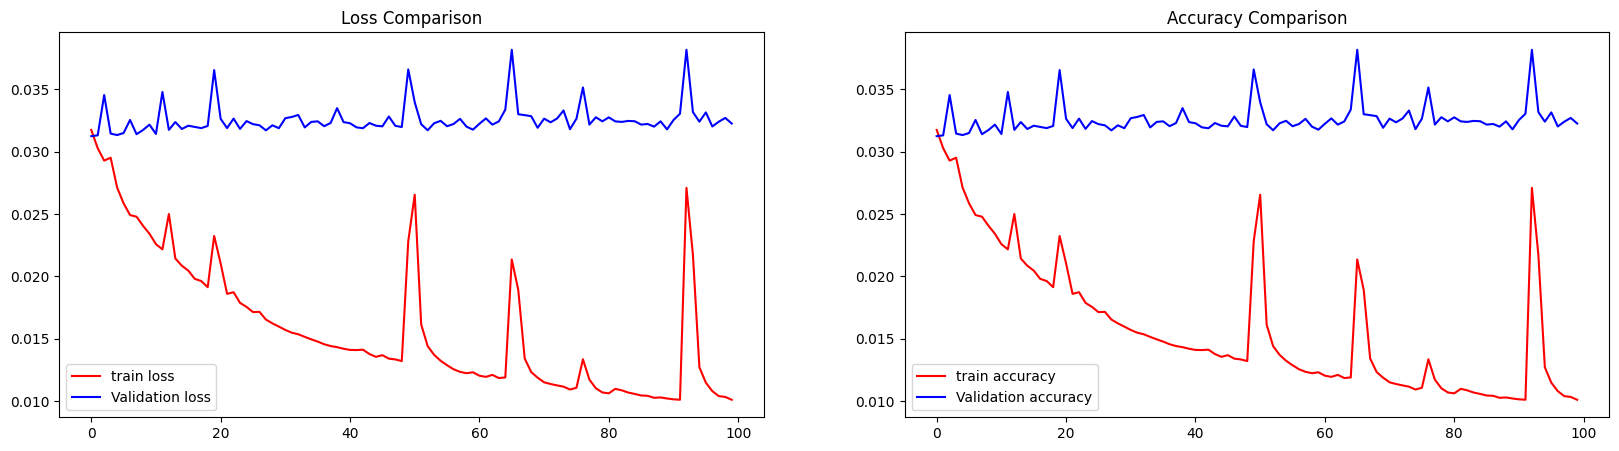

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(20, 5))
axis[0].plot(results.history["loss"], color='r', label = 'train loss')
axis[0].plot(results.history["val_loss"], color='b', label = 'Validation loss')
axis[0].set_title('Loss Comparison')
axis[0].legend()
axis[1].plot(results.history["mae"], color='r', label = 'train accuracy')
axis[1].plot(results.history["val_mae"], color='b', label = 'Validation accuracy')
axis[1].set_title('Accuracy Comparison')
axis[1].legend()

In [ ]:
unet.evaluate(images_val, images_val_ab)

NameError: ignored

In [ ]:
pred = unet.predict(gray_valid[:,:,:,:])
pred.shape

In [ ]:
pred_rgb = tfio.experimental.color.lab_to_rgb(pred)
#valid_rgb = tfio.experimental.color.lab_to_rgb(valid)

In [ ]:
# Results of Validation Dataset
def VisualizeResults(index):
    valid_rgb = tfio.experimental.color.lab_to_rgb(valid[index,:,:,:])
    img = valid_rgb[index,:,:,0:1]
    img = img[np.newaxis, ...]
    pred_color = pred_rgb[index,:,:,:]
    pred_color = tf.argmax(pred_color[0], axis=-1)
    pred_color = pred_color[..., tf.newaxis]
    fig, arr = plt.subplots(1, 3, figsize=(15, 15))
    arr[0].imshow(valid_rgb[index,:,:,:])
    arr[0].set_title('gray Image')
    arr[1].imshow(tfio.experimental.color.lab_to_rgb(valid[index,:,:,0]))
    arr[1].set_title('Actual Image ')
    arr[2].imshow(pred_color[:,:,0])
    arr[2].set_title('Predicted Image ')

In [ ]:
index = 1
VisualizeResults(index)

In [ ]:
def sample_batch(data, bsize):
    idxs = np.random.choice(np.arange(data.shape[0]), size=bsize)
    return idxs
def sample_images(data, gray, nrow, epoch):
    idx = sample_batch(gray, bsize=nrow)
    gray_batch = gray[idx]
    color_batch = data[idx]
    images = model.predict(gray_batch)
    return np.array([images, gray_batch, color_batch])